In [1]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

In [3]:
df_all_1key = pd.read_csv('features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_all.csv')
df_all_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0298.txt.enc,txt_ecb,7.941436,128.264842,5560.453276,74.568447,-0.000422,-1.215835,318579,10.250475,...,8,11,13,11,15,13,11,12,13,DES
1,file0288.txt.enc,txt_ecb,7.973139,128.691301,5460.519735,73.895330,-0.007466,-1.191889,853285,10.312206,...,33,29,38,47,38,40,32,37,32,DES
2,file0221.txt.enc,txt_ecb,7.975520,127.344546,5554.037296,74.525414,-0.004480,-1.217304,768541,10.314416,...,29,30,29,27,29,27,22,41,22,DES
3,file0359.txt.enc,txt_ecb,7.970208,127.216202,5464.742489,73.923897,-0.006931,-1.199113,616501,10.232529,...,16,20,35,20,17,22,24,26,23,DES
4,file0231.txt.enc,txt_ecb,7.917245,128.059629,5262.741586,72.544756,-0.033794,-1.158340,239975,10.295437,...,6,8,7,12,13,11,8,7,5,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,file0154.html.enc,html_ecb,7.981407,127.629622,5412.285008,73.568234,-0.015718,-1.190541,1102176,10.302512,...,31,37,31,45,38,39,29,39,48,AES
5996,file0122.html.enc,html_ecb,7.971460,127.238252,5452.887315,73.843668,0.009367,-1.204137,681689,10.333482,...,24,17,36,31,25,32,26,21,14,AES
5997,file0123.html.enc,html_ecb,7.938808,125.883929,5557.961726,74.551739,0.033313,-1.229742,314193,10.193125,...,8,13,15,14,9,10,8,15,15,AES
5998,file0063.html.enc,html_ecb,7.955752,125.726691,5392.194001,73.431560,0.037385,-1.215672,408261,10.226194,...,11,12,9,12,16,17,18,13,11,AES


In [4]:
df_all_3keys = pd.read_csv('features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_all.csv')
df_all_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0298.txt.enc,txt_ecb,7.940933,127.610488,5360.173149,73.213203,-0.003090,-1.201361,321881,10.303460,...,7,13,10,7,9,14,9,12,11,DES
1,file0288.txt.enc,txt_ecb,7.976503,128.675474,5486.467464,74.070692,-0.032627,-1.203523,862148,10.365624,...,30,38,26,35,27,27,29,21,34,DES
2,file0221.txt.enc,txt_ecb,7.977162,126.111019,5484.744042,74.059058,0.027944,-1.195996,768848,10.316476,...,35,30,36,31,26,29,25,30,24,DES
3,file0359.txt.enc,txt_ecb,7.968994,126.644192,5462.879345,73.911294,0.015035,-1.198214,621185,10.271328,...,30,26,15,19,24,15,28,24,24,DES
4,file0231.txt.enc,txt_ecb,7.908196,129.770318,5585.471098,74.736009,-0.042072,-1.211003,241722,10.332844,...,12,11,8,12,7,1,4,20,7,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,file0154.html.enc,html_ecb,7.985803,128.499422,5474.443374,73.989482,-0.012442,-1.208515,1103418,10.308315,...,41,41,40,38,41,52,43,41,51,AES
5996,file0122.html.enc,html_ecb,7.969448,128.542293,5485.397647,74.063470,-0.019441,-1.197604,672624,10.264546,...,19,20,16,25,23,19,30,29,26,AES
5997,file0123.html.enc,html_ecb,7.935927,125.396825,5519.085916,74.290551,0.012731,-1.206622,323392,10.341267,...,12,10,13,13,3,7,10,12,9,AES
5998,file0063.html.enc,html_ecb,7.955287,129.381404,5493.679582,74.119360,-0.017936,-1.217595,411575,10.267615,...,18,15,14,16,18,13,24,14,13,AES


In [5]:
df_all_6keys = pd.read_csv('features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_all.csv')
df_all_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0298.txt.enc,txt_ecb,7.938249,125.651055,5532.370982,74.379910,0.037181,-1.206967,314462,10.184026,...,8,13,11,10,8,13,22,10,12,DES
1,file0288.txt.enc,txt_ecb,7.977318,127.158898,5382.482852,73.365406,0.006538,-1.174507,844127,10.256718,...,34,28,28,19,29,26,35,30,41,DES
2,file0221.txt.enc,txt_ecb,7.973329,126.214839,5485.258661,74.062532,0.014028,-1.197820,763666,10.281651,...,19,24,25,25,30,28,30,30,35,DES
3,file0359.txt.enc,txt_ecb,7.968524,127.645380,5596.918742,74.812557,0.011897,-1.241909,620806,10.268194,...,32,24,26,26,21,25,28,24,26,DES
4,file0231.txt.enc,txt_ecb,7.923853,126.997350,5483.316247,74.049418,-0.032355,-1.227326,235768,10.204793,...,6,7,9,5,6,12,9,3,7,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,file0154.html.enc,html_ecb,7.980599,127.227562,5449.807904,73.822814,0.008930,-1.208537,1086217,10.227652,...,43,34,41,42,40,40,36,34,49,AES
5996,file0122.html.enc,html_ecb,7.975232,127.117638,5574.990391,74.665858,0.003036,-1.220415,671933,10.259272,...,26,30,19,26,30,30,29,22,28,AES
5997,file0123.html.enc,html_ecb,7.942044,128.994378,5430.827019,73.694145,-0.000780,-1.186196,313427,10.180692,...,14,12,15,10,15,11,12,6,14,AES
5998,file0063.html.enc,html_ecb,7.953697,127.901639,5333.266452,73.029216,-0.030033,-1.181412,411510,10.266804,...,11,13,14,16,15,8,10,17,12,AES


In [6]:
encoder = LabelEncoder()
df_all_1key['algorithm'] = encoder.fit_transform(df_all_1key['algorithm'])
print(encoder.classes_)

X = df_all_1key.drop(columns=["algorithm", "file_name", "format"])
y = df_all_1key["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []
    
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

(<pandas.io.formats.style.Styler at 0x163bd5ac0>,
 <pandas.io.formats.style.Styler at 0x163b25400>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.761333,0.010601,0.767089,0.009573,0.761333,0.010601,0.759678,0.010398,0.707990,0.941606
1,SVM,0.409000,0.005878,0.429676,0.012949,0.409000,0.005878,0.360991,0.009209,1.210170,0.735584
2,NaiveBayes,0.297000,0.013433,0.344664,0.017581,0.297000,0.013433,0.253609,0.017351,23.361493,0.611958
3,KNN,0.547000,0.010309,0.566545,0.008872,0.547000,0.010309,0.540803,0.009914,6.456606,0.792162
4,Bagging,0.740833,0.010435,0.744255,0.009854,0.740833,0.010435,0.739074,0.010005,0.631925,0.935794
5,AdaBoost,0.499167,0.021557,0.567330,0.033362,0.499167,0.021557,0.476063,0.029474,1.584993,0.784462


In [2]:
import pandas as pd

data = [
    [0, "RandomForest", 0.761333, 0.010601, 0.767089, 0.009573, 0.761333, 0.010601, 0.759678, 0.010398, 0.707990, 0.941606],
    [1, "SVM", 0.409000, 0.005878, 0.429676, 0.012949, 0.409000, 0.005878, 0.360991, 0.009209, 1.210170, 0.735584],
    [2, "NaiveBayes", 0.297000, 0.013433, 0.344664, 0.017581, 0.297000, 0.013433, 0.253609, 0.017351, 23.361493, 0.611958],
    [3, "KNN", 0.547000, 0.010309, 0.566545, 0.008872, 0.547000, 0.010309, 0.540803, 0.009914, 6.456606, 0.792162],
    [4, "Bagging", 0.740833, 0.010435, 0.744255, 0.009854, 0.740833, 0.010435, 0.739074, 0.010005, 0.631925, 0.935794],
    [5, "AdaBoost", 0.499167, 0.021557, 0.567330, 0.033362, 0.499167, 0.021557, 0.476063, 0.029474, 1.584993, 0.784462]
]

columns = [
    "ID", "Model",
    "Dokładność", "Odch. std (dokł.)",
    "Precyzja", "Odch. std (prec.)",
    "Czułość", "Odch. std (czuł.)",
    "F1-score", "Odch. std (F1)",
    "Strata log.", "AUC"
]

df = pd.DataFrame(data, columns=columns)

# Jeśli chcesz od razu zobaczyć wynik:
df


,ID,Model,Dokładność,Odch. std (dokł.),Precyzja,Odch. std (prec.),Czułość,Odch. std (czuł.),F1-score,Odch. std (F1),Strata log.,AUC
0,0,RandomForest,0.761333,0.010601,0.767089,0.009573,0.761333,0.010601,0.759678,0.010398,0.707990,0.941606
1,1,SVM,0.409000,0.005878,0.429676,0.012949,0.409000,0.005878,0.360991,0.009209,1.210170,0.735584
2,2,NaiveBayes,0.297000,0.013433,0.344664,0.017581,0.297000,0.013433,0.253609,0.017351,23.361493,0.611958
3,3,KNN,0.547000,0.010309,0.566545,0.008872,0.547000,0.010309,0.540803,0.009914,6.456606,0.792162
4,4,Bagging,0.740833,0.010435,0.744255,0.009854,0.740833,0.010435,0.739074,0.010005,0.631925,0.935794
5,5,AdaBoost,0.499167,0.021557,0.567330,0.033362,0.499167,0.021557,0.476063,0.029474,1.584993,0.784462


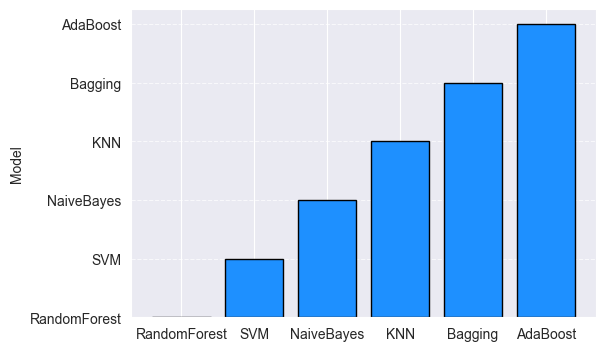

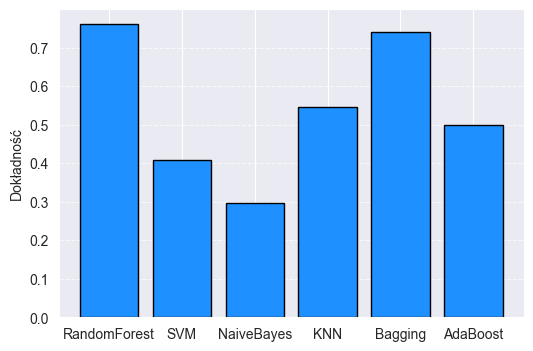

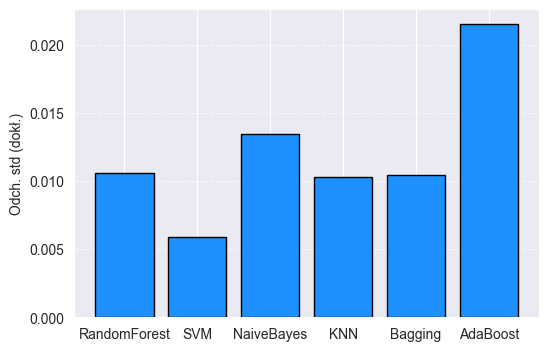

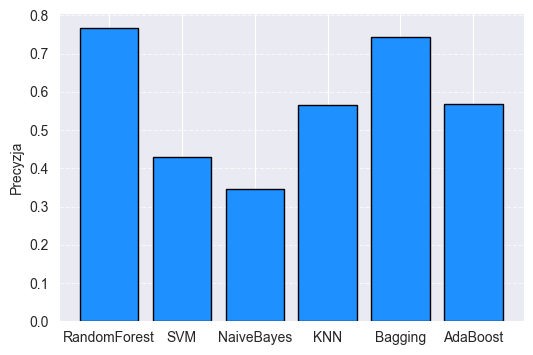

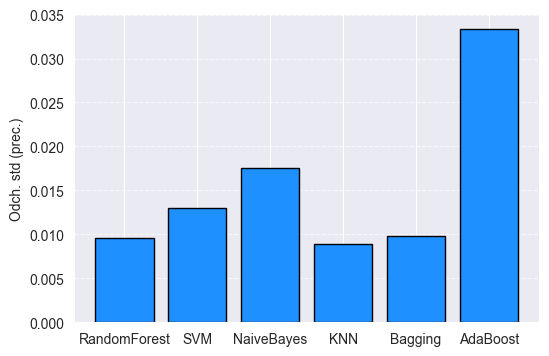

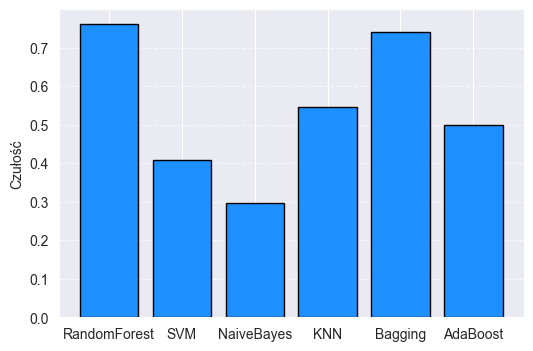

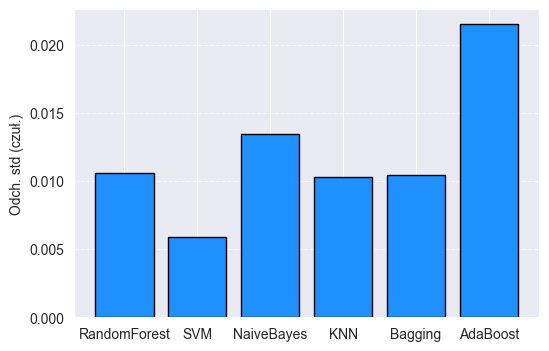

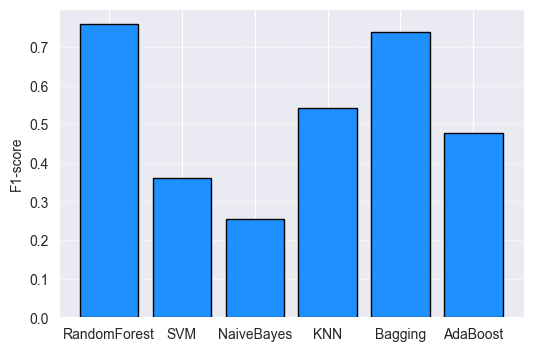

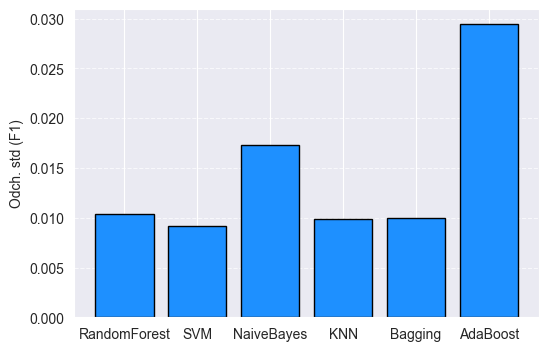

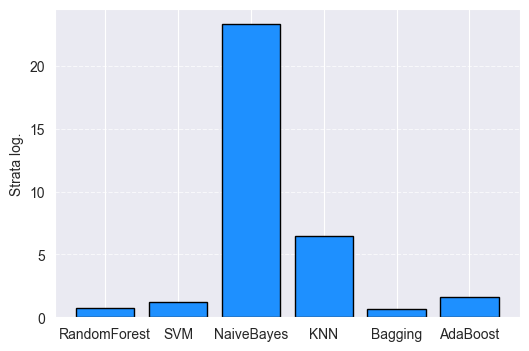

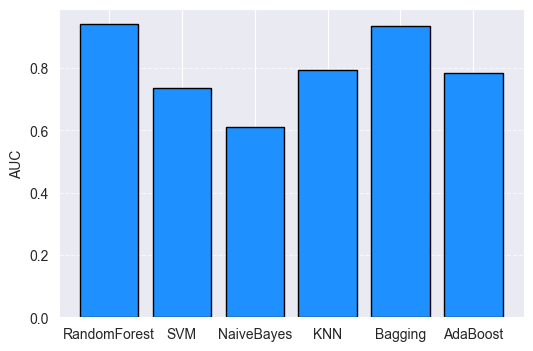

In [4]:
for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

In [16]:
df_class_results_1key = pd.read_csv('training_1000_ecb/df_class_results_1000_ecb_1key.csv')
df_class_results_1key

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.586207,0.623853,0.604444
1,1,RandomForest,1,0.713311,0.853061,0.776952
2,2,RandomForest,2,0.732394,0.629032,0.676790
3,3,RandomForest,3,0.705882,0.623377,0.662069
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.321348,0.569721,0.410920
146,146,AdaBoost,1,0.420118,0.308696,0.355890
147,147,AdaBoost,2,0.466667,0.327660,0.385000
148,148,AdaBoost,3,0.418079,0.307054,0.354067


In [12]:
encoder = LabelEncoder()
df_all_3keys['algorithm'] = encoder.fit_transform(df_all_3keys['algorithm'])
print(encoder.classes_)

X = df_all_3keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_3keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


(<pandas.io.formats.style.Styler at 0x169ea8be0>,
 <pandas.io.formats.style.Styler at 0x169f45460>)

In [13]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.699833,0.011060,0.708075,0.009547,0.699833,0.011060,0.699584,0.011101,0.820922,0.908605
1,SVM,0.414667,0.011038,0.447977,0.016573,0.414667,0.011038,0.368258,0.013228,1.204274,0.731456
2,NaiveBayes,0.284167,0.015555,0.351505,0.027159,0.284167,0.015555,0.239249,0.015296,24.033065,0.608407
3,KNN,0.514000,0.008570,0.532024,0.008209,0.514000,0.008570,0.507528,0.007643,6.758726,0.773535
4,Bagging,0.689000,0.007138,0.695207,0.007411,0.689000,0.007138,0.688670,0.006892,0.731027,0.913935
5,AdaBoost,0.457500,0.009747,0.564084,0.051750,0.457500,0.009747,0.391586,0.015615,1.584905,0.769387


In [2]:
import pandas as pd

# Dane źródłowe
data = [
    ["RandomForest", 0.699833, 0.011060, 0.708075, 0.009547, 0.699833, 0.011060, 0.699584, 0.011101, 0.820922, 0.908605],
    ["SVM", 0.414667, 0.011038, 0.447977, 0.016573, 0.414667, 0.011038, 0.368258, 0.013228, 1.204274, 0.731456],
    ["NaiveBayes", 0.284167, 0.015555, 0.351505, 0.027159, 0.284167, 0.015555, 0.239249, 0.015296, 24.033065, 0.608407],
    ["KNN", 0.514000, 0.008570, 0.532024, 0.008209, 0.514000, 0.008570, 0.507528, 0.007643, 6.758726, 0.773535],
    ["Bagging", 0.689000, 0.007138, 0.695207, 0.007411, 0.689000, 0.007138, 0.688670, 0.006892, 0.731027, 0.913935],
    ["AdaBoost", 0.457500, 0.009747, 0.564084, 0.051750, 0.457500, 0.009747, 0.391586, 0.015615, 1.584905, 0.769387]
]

# Nagłówki kolumn odpowiadające metrykom
columns = [
    "Model",
    "Średnia dokładność", "Odch. std (dokł.)",
    "Średnia precyzja", "Odch. std (prec.)",
    "Średnia czułość", "Odch. std (czuł.)",
    "Średni F1-score", "Odch. std (F1)",
    "Średnia strata log.", "Średni AUC"
]

# Tworzenie DataFrame
df = pd.DataFrame(data, columns=columns)

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1-score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.699833,0.011060,0.708075,0.009547,0.699833,0.011060,0.699584,0.011101,0.820922,0.908605
1,SVM,0.414667,0.011038,0.447977,0.016573,0.414667,0.011038,0.368258,0.013228,1.204274,0.731456
2,NaiveBayes,0.284167,0.015555,0.351505,0.027159,0.284167,0.015555,0.239249,0.015296,24.033065,0.608407
3,KNN,0.514000,0.008570,0.532024,0.008209,0.514000,0.008570,0.507528,0.007643,6.758726,0.773535
4,Bagging,0.689000,0.007138,0.695207,0.007411,0.689000,0.007138,0.688670,0.006892,0.731027,0.913935
5,AdaBoost,0.457500,0.009747,0.564084,0.051750,0.457500,0.009747,0.391586,0.015615,1.584905,0.769387


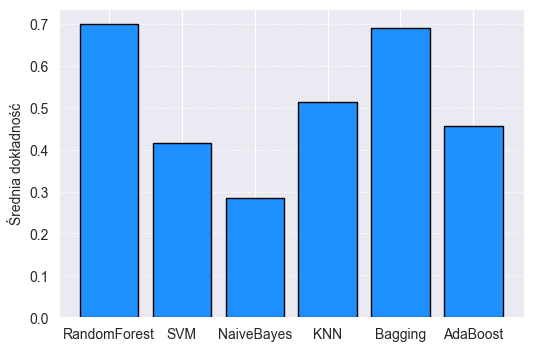

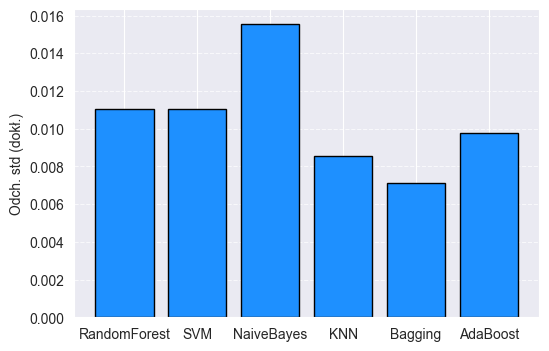

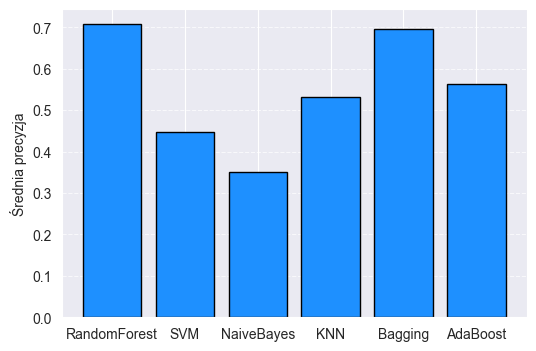

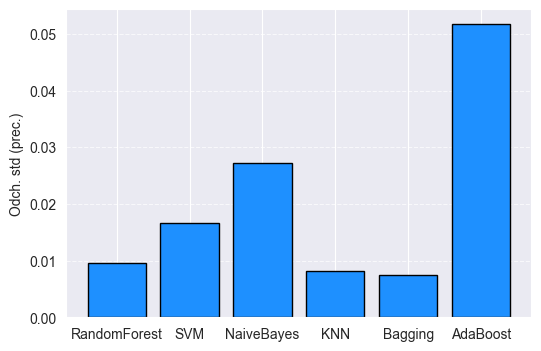

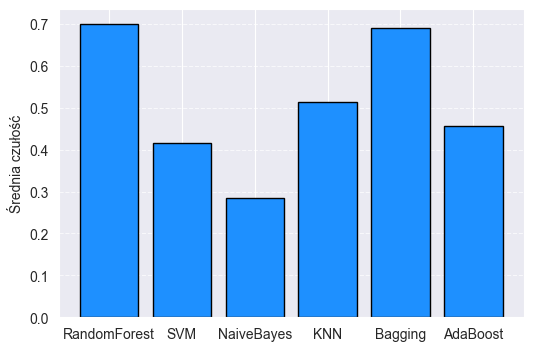

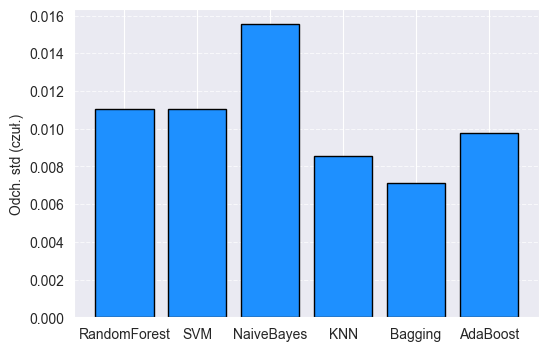

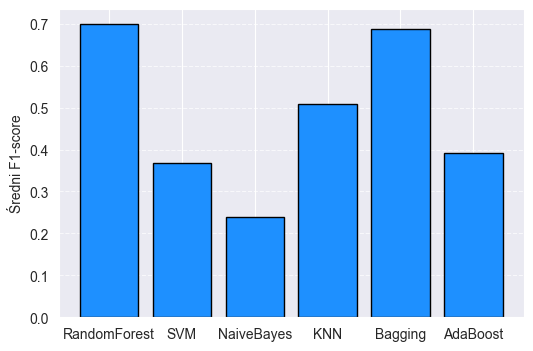

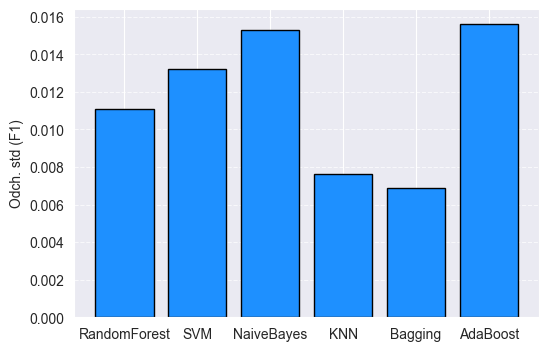

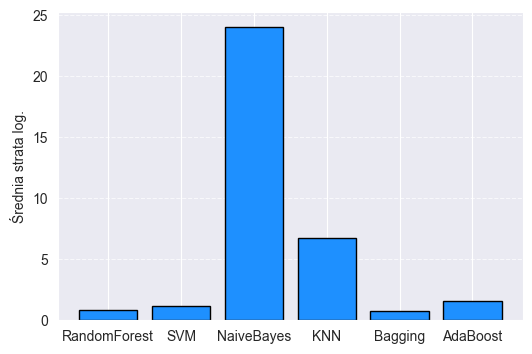

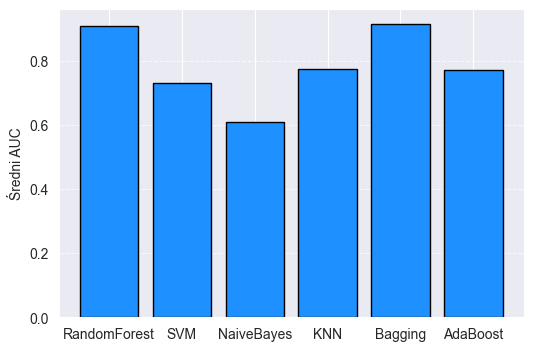

In [4]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

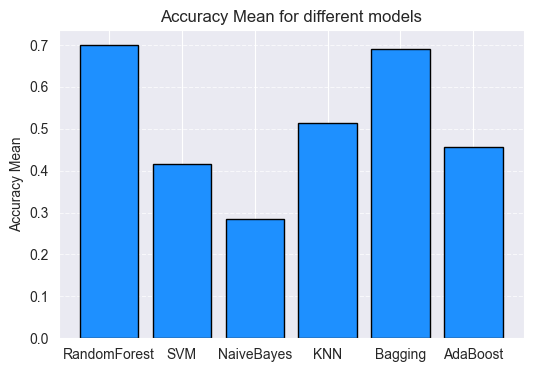

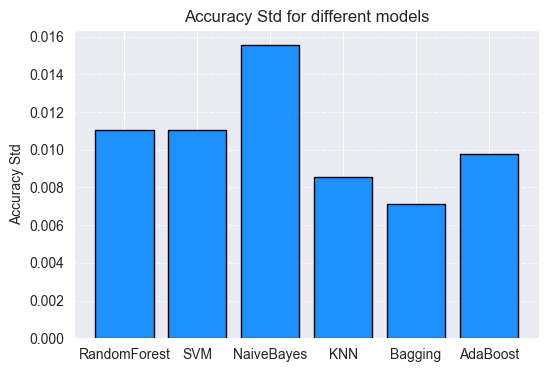

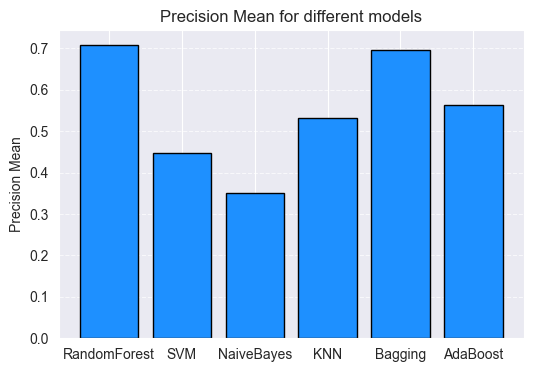

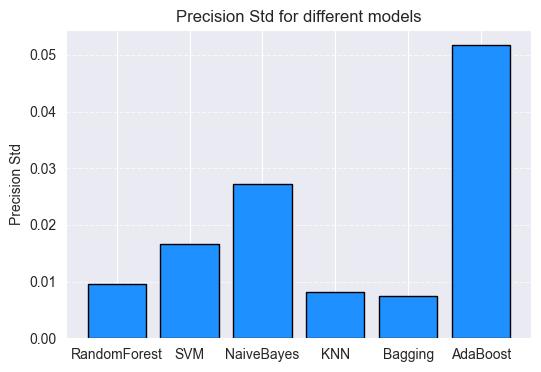

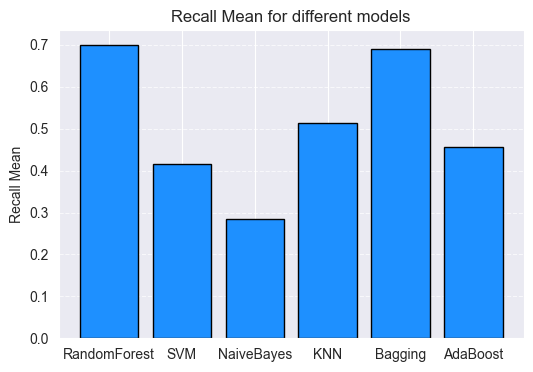

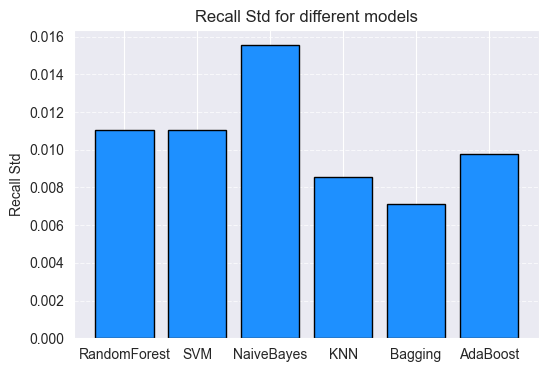

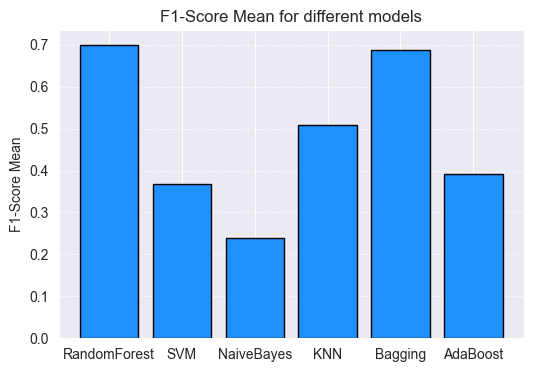

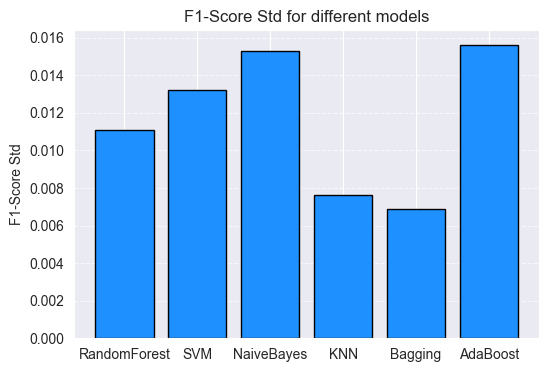

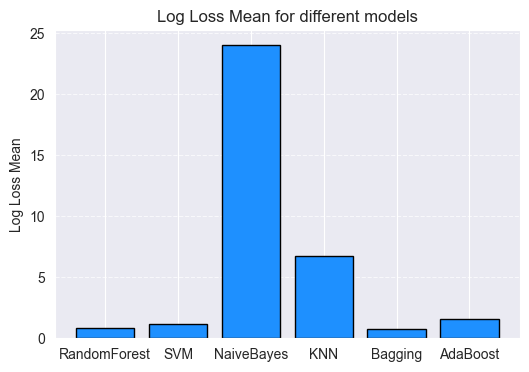

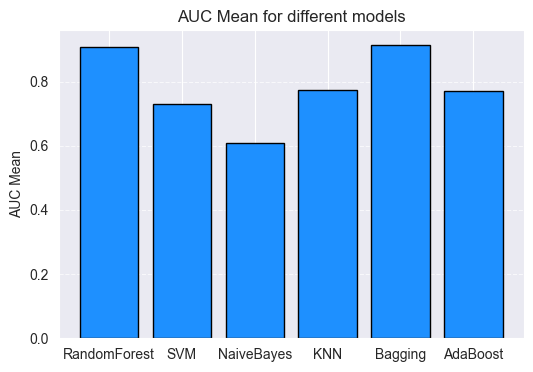

Best model: RandomForest with F1-Score = 0.6990835773950469
Worst model: NaiveBayes with F1-Score = 0.23966292299335176


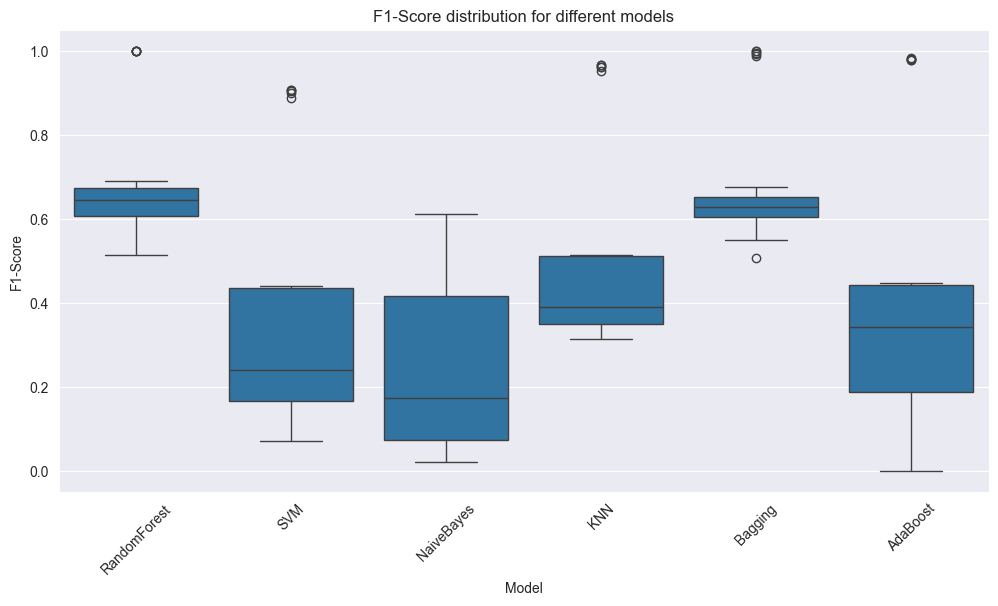

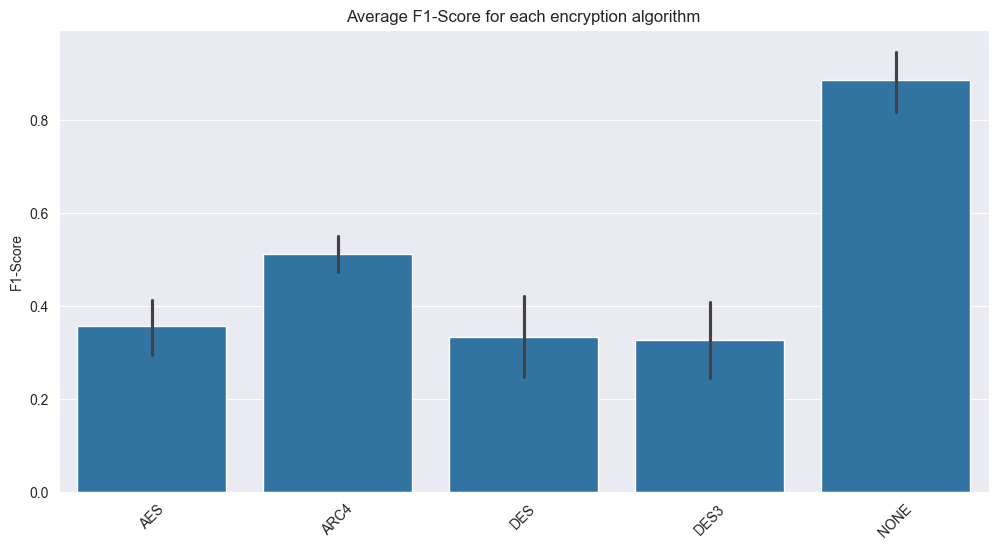

In [14]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [17]:
df_class_results_3keys = pd.read_csv('training_1000_ecb/df_class_results_1000_ecb_3keys.csv')
df_class_results_3keys

,0,RandomForest,0.1,0.511905,0.591743,0.548936
0,1,RandomForest,1,0.616197,0.714286,0.661626
1,2,RandomForest,2,0.676056,0.580645,0.624729
2,3,RandomForest,3,0.652850,0.545455,0.594340
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.533784,0.661088,0.590654
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.595745,0.111554,0.187919
145,146,AdaBoost,1,0.652174,0.260870,0.372671
146,147,AdaBoost,2,0.300000,0.012766,0.024490
147,148,AdaBoost,3,0.287129,0.962656,0.442326


In [18]:
encoder = LabelEncoder()
df_all_6keys['algorithm'] = encoder.fit_transform(df_all_6keys['algorithm'])
print(encoder.classes_)

X = df_all_6keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_6keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(<pandas.io.formats.style.Styler at 0x174b9f850>,
 <pandas.io.formats.style.Styler at 0x169e914c0>)

In [19]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.659333,0.012115,0.664760,0.011011,0.659333,0.012115,0.659986,0.012181,0.866283,0.888769
1,SVM,0.410000,0.009832,0.433477,0.016615,0.410000,0.009832,0.361378,0.013695,1.217828,0.735614
2,NaiveBayes,0.278833,0.008985,0.335980,0.022915,0.278833,0.008985,0.232255,0.013979,24.210449,0.606725
3,KNN,0.511000,0.009360,0.529314,0.007890,0.511000,0.009360,0.506683,0.008754,7.090397,0.765498
4,Bagging,0.655833,0.008148,0.662943,0.005268,0.655833,0.008148,0.656137,0.007384,0.789610,0.895214
5,AdaBoost,0.451667,0.022092,0.530358,0.060730,0.451667,0.022092,0.383067,0.039201,1.584229,0.767468


In [8]:
import pandas as pd

data = {
    "Model": ["RandomForest", "SVM", "NaiveBayes", "KNN", "Bagging", "AdaBoost"],
    "Średnia dokładność": [0.659333, 0.410000, 0.278833, 0.511000, 0.655833, 0.451667],
    "Odch. std (dokł.)": [0.012115, 0.009832, 0.008985, 0.009360, 0.008148, 0.022092],
    "Średnia precyzja": [0.664760, 0.433477, 0.335980, 0.529314, 0.662943, 0.530358],
    "Odch. std (prec.)": [0.011011, 0.016615, 0.022915, 0.007890, 0.005268, 0.060730],
    "Średnia czułość": [0.659333, 0.410000, 0.278833, 0.511000, 0.655833, 0.451667],
    "Odch. std (czuł.)": [0.012115, 0.009832, 0.008985, 0.009360, 0.008148, 0.022092],
    "Średni F1-score": [0.659986, 0.361378, 0.232255, 0.506683, 0.656137, 0.383067],
    "Odch. std (F1)": [0.012181, 0.013695, 0.013979, 0.008754, 0.007384, 0.039201],
    "Średnia strata log.": [0.866283, 1.217828, 24.210449, 7.090397, 0.789610, 1.584229],
    "Średni AUC": [0.888769, 0.735614, 0.606725, 0.765498, 0.895214, 0.767468]
}

columns = [
    "Model",
    "Średnia dokładność", "Odch. std (dokł.)",
    "Średnia precyzja", "Odch. std (prec.)",
    "Średnia czułość", "Odch. std (czuł.)",
    "Średni F1-score", "Odch. std (F1)",
    "Średnia strata log.", "Średni AUC"
]

df_metrics = pd.DataFrame(data)
df_metrics

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1-score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.659333,0.012115,0.664760,0.011011,0.659333,0.012115,0.659986,0.012181,0.866283,0.888769
1,SVM,0.410000,0.009832,0.433477,0.016615,0.410000,0.009832,0.361378,0.013695,1.217828,0.735614
2,NaiveBayes,0.278833,0.008985,0.335980,0.022915,0.278833,0.008985,0.232255,0.013979,24.210449,0.606725
3,KNN,0.511000,0.009360,0.529314,0.007890,0.511000,0.009360,0.506683,0.008754,7.090397,0.765498
4,Bagging,0.655833,0.008148,0.662943,0.005268,0.655833,0.008148,0.656137,0.007384,0.789610,0.895214
5,AdaBoost,0.451667,0.022092,0.530358,0.060730,0.451667,0.022092,0.383067,0.039201,1.584229,0.767468


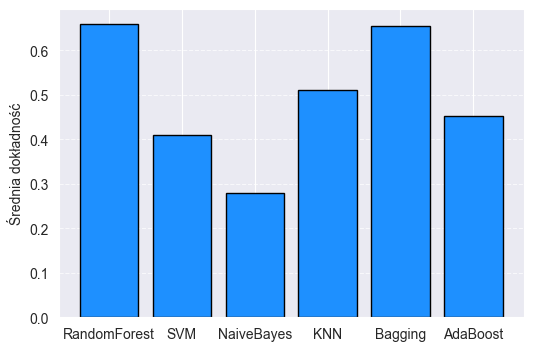

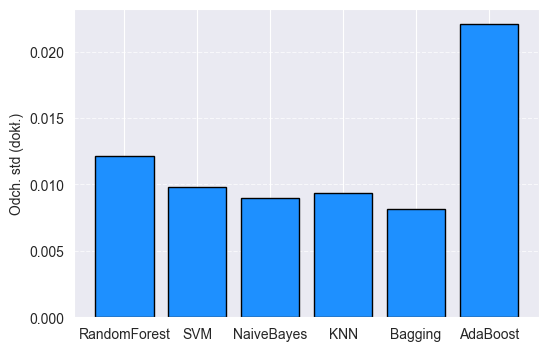

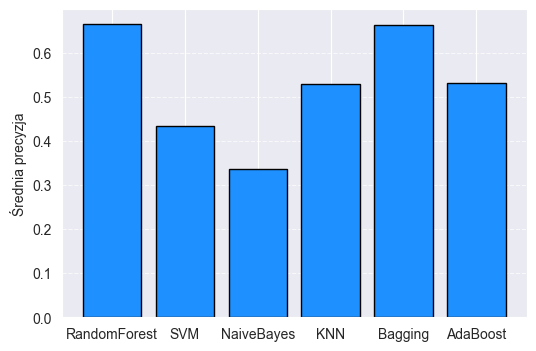

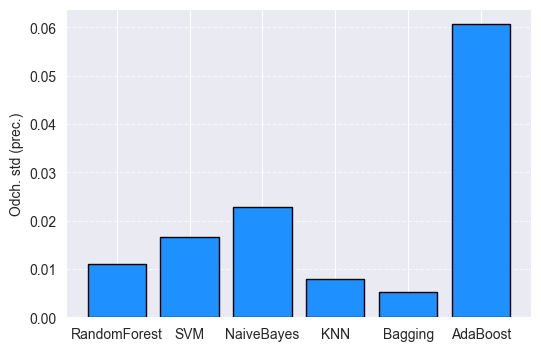

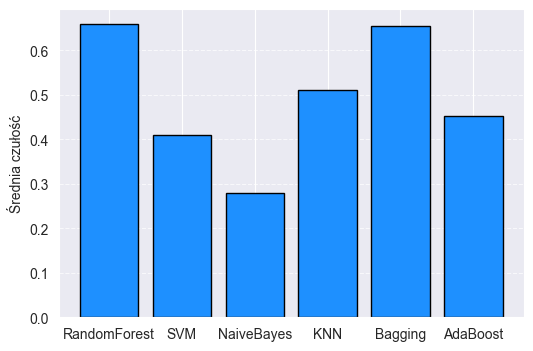

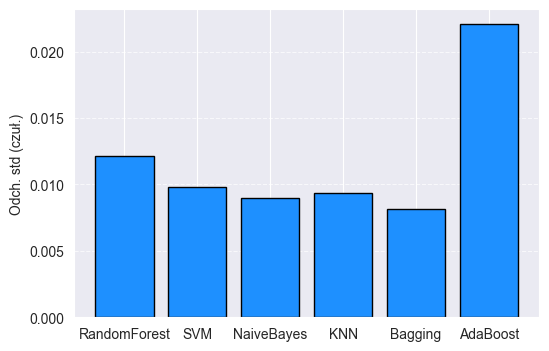

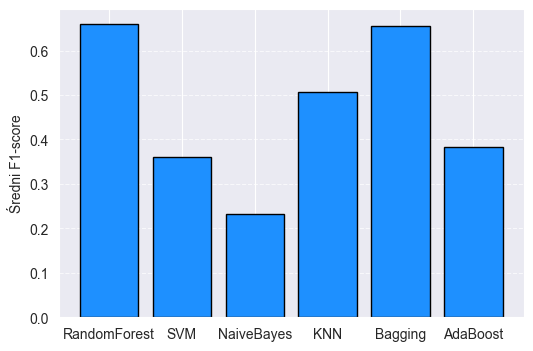

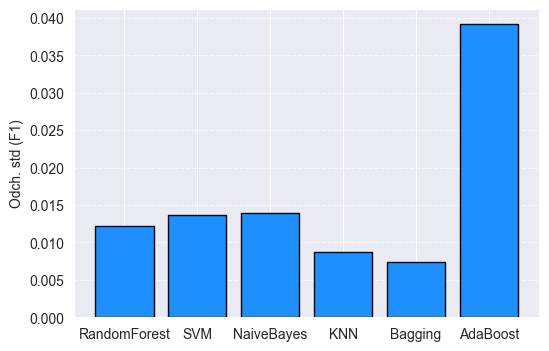

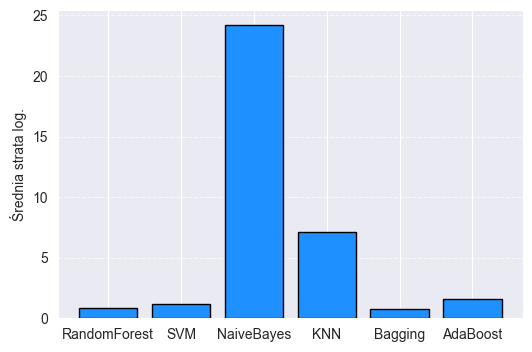

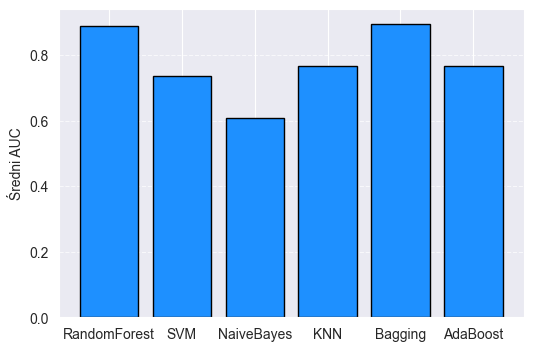

In [9]:
import matplotlib.pyplot as plt

for metric in df_metrics.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df_metrics[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

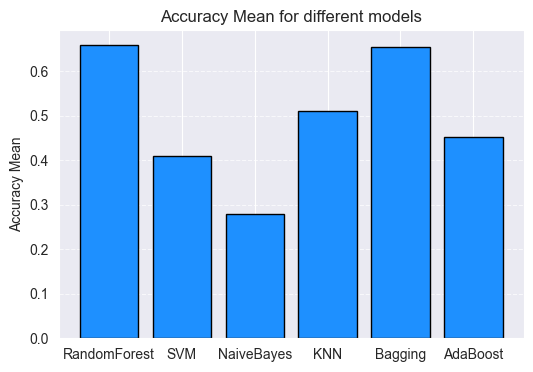

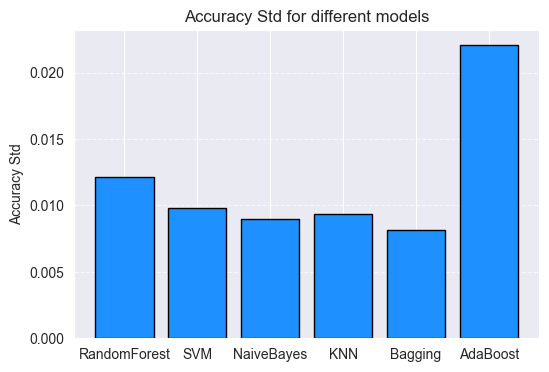

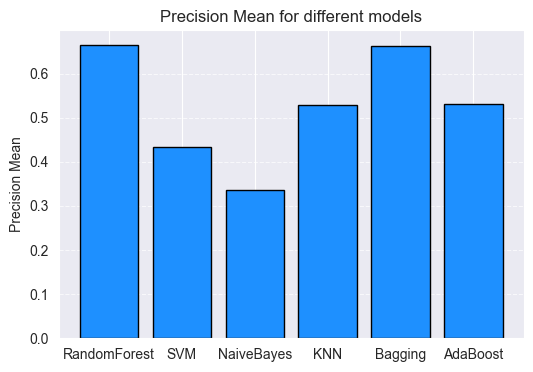

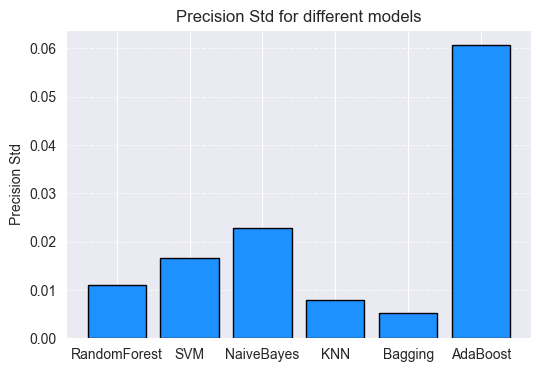

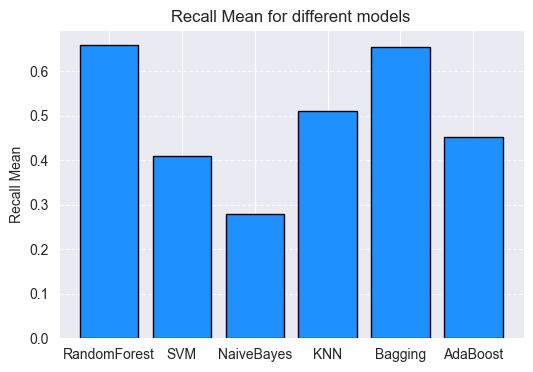

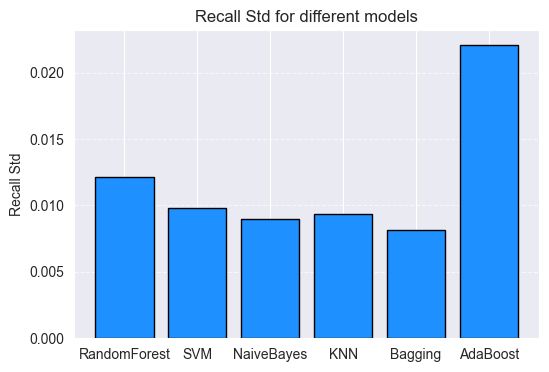

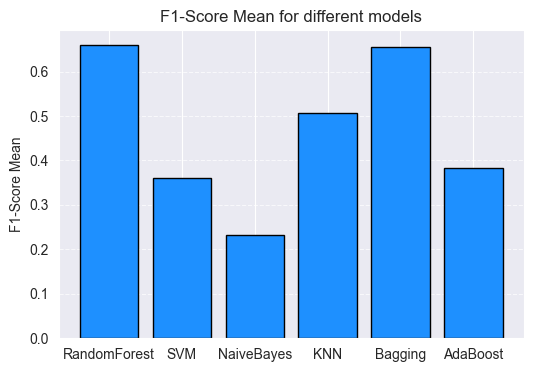

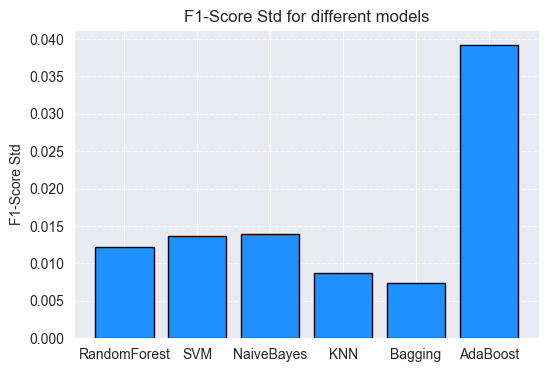

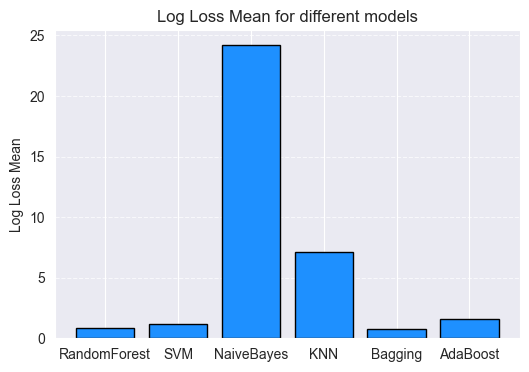

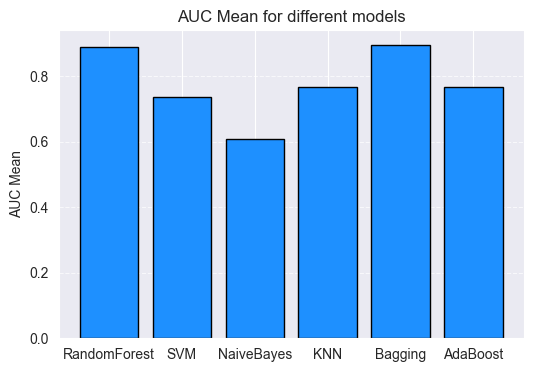

Best model: RandomForest with F1-Score = 0.6598036688600045
Worst model: NaiveBayes with F1-Score = 0.23178458253863984


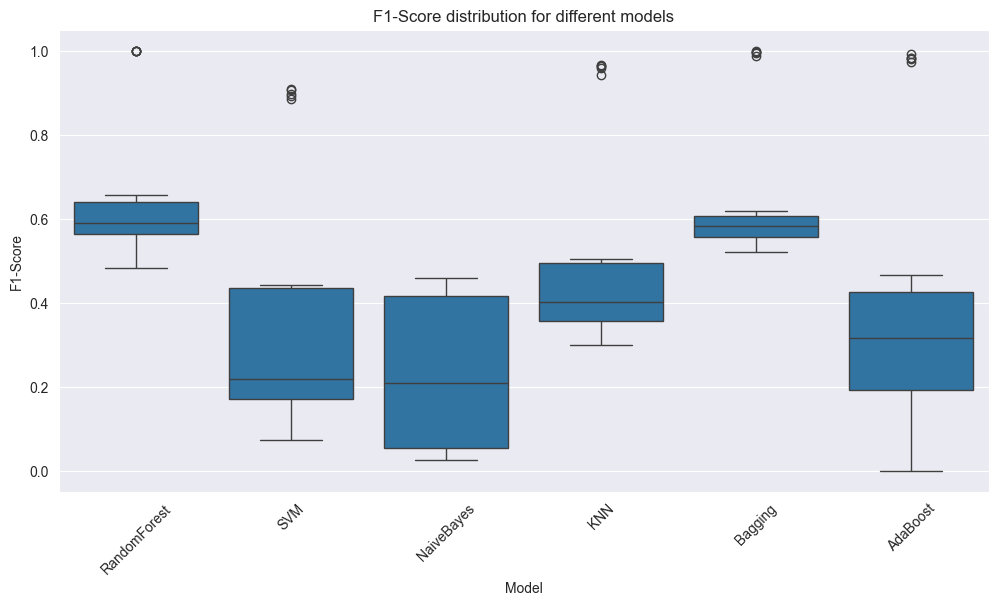

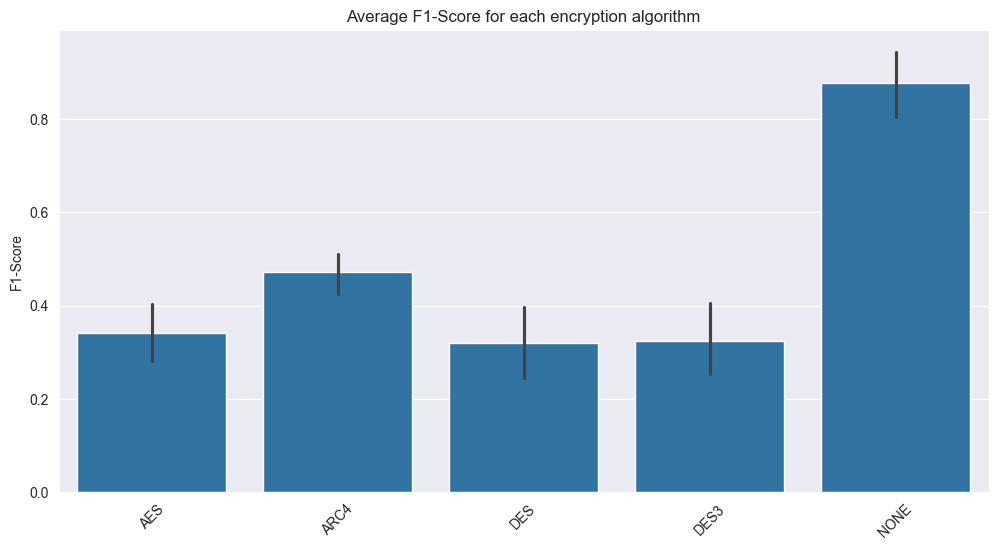

In [20]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [22]:
df_class_results_6keys = pd.read_csv('training_1000_ecb/df_class_results_1000_ecb_6keys.csv')
df_class_results_6keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.473485,0.573394,0.518672
1,1,RandomForest,1,0.565891,0.595918,0.580517
2,2,RandomForest,2,0.647343,0.540323,0.589011
3,3,RandomForest,3,0.647887,0.597403,0.621622
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.580000,0.115538,0.192691
146,146,AdaBoost,1,0.269704,0.952174,0.420345
147,147,AdaBoost,2,0.142857,0.004255,0.008264
148,148,AdaBoost,3,0.493671,0.161826,0.243750
